# Импорты


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# 1.1. Функции Python
## 1.2.1. Пример
Напишите функцию sum_range(start, end), которая суммирует все целые
числа от значения «start» до величины «end» включительно.
Если пользователь задаст первое число большее чем второе, просто
поменяйте их местами.

In [2]:
def sum_range(start, end):
  if start > end:
    end, start = start, end
  return sum(range(start, end + 1))

print(sum_range(2, 12))
print(sum_range(-4, 4))
print(sum_range(3, 2))

77
0
5


## 1.2.2. Пример
Напишите рекурсивную функцию вычисления факториала на языке
Python.

In [3]:
def fact(num):
  if num == 0:
    return 1
  else:
    return num * fact(num - 1)
  
print(fact(5))

120


# 1.1. Расстояние между объектами класса
## 1.2.3. Пример
Напишите функции в Python, которая вычисляет Евклидово расстояние
между двумя массивами NumPy

In [4]:
def euclidean_distance(v1, v2):
  return sum((x - y) ** 2 for x, y in zip(v1, v2)) ** 0.5

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
print(euclidean_distance(x, y))

5.196152422706632


## 1.2.4. Пример
Напишите 4 функции в Python, которые рассчитывают квадрат Евклидова
расстояния, взвешенное евклидово расстояние, Хеммингово расстояние и
расстояние Чебышева между двумя массивами NumPy.

In [5]:
def sqr_euclidean_distance(v1, v2):
  return sum((x - y) ** 2 for x, y in zip(v1, v2))

def weighted_euclidean_distance(v1, v2, w):
  return sum((x - y) ** 2 * s for x, y, s in zip(v1, v2, w)) ** 0.5

def manhattan_distance(v1, v2):
  return sum(abs(x - y) for (x, y) in zip(v1, v2))

def chebyshev_distance(v1, v2):
  return max(abs(x - y) for (x, y) in zip(v1, v2))

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
w = np.array([0, 0, 1])
print(sqr_euclidean_distance(x, y))
print(weighted_euclidean_distance(x, y, w))
print(manhattan_distance(x, y))
print(chebyshev_distance(x, y))

27
3.0
9
3


## 1.2.5. Пример
В Python есть встроенные функции для вычисления расстояний между
векторами. Мы будем использовать NumPy для расчета расстояния для
двух точек, поскольку ранее рассмотренные структуры данных могут быть
переведены в Numpy массив с помошью специальных функциий.
Например, для серий это будет выглядеть следующим образом:
seriesName.to_numpy().
Для удобства визуализации и анализа результатов в дальнейших расчетах
будм использовать 2 точки в 3-х мерном пространстве:


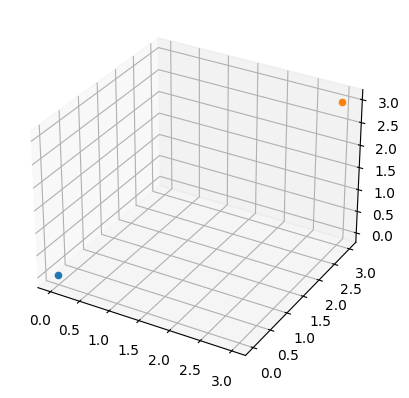

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

## 1.2.6. Пример
Рассчитать расстояния между двумя точками с использованием методов
определения расстояний, представленных выше

In [7]:
# Расстояние Евклида
print(np.linalg.norm(x - y))
# Квадрат Евклидова расстояния
print(np.linalg.norm(x - y) ** 2)
# Расстояние Чебышева
print(np.linalg.norm(x - y, ord = np.inf))
# Расстояние Хемминга
print(np.linalg.norm(x - y, ord = 1))

5.196152422706632
27.0
3.0
9.0


## 1.3.1. Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

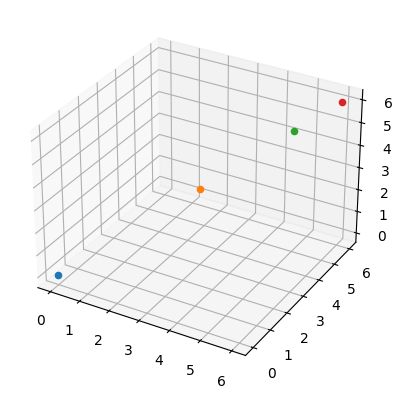

5.196152422706632
27.0
1.0
3.0


In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
ax.scatter(5, 5, 5)
ax.scatter(6, 6, 6)
plt.show()
x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
p1 = np.array([5, 5, 5])
p2 = np.array([6, 6, 6])
print(np.linalg.norm(x-y))
print(np.linalg.norm(x-y)**2)
print(np.linalg.norm(p1-p2, ord = np.inf))
print(np.linalg.norm(p1-p2, ord = 1))


## 1.3.2. Задание
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [9]:
Z = np.zeros((5, 5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# 2.1. Задачи классификации
## 2.2.1. Пример
В примере показано создание 2d-массива со значениями x и y. Список
target содержит возможные выходные классы (часто называемые
метками). Далее происходит обучене классификатора k-ближайших
соседей по исходным данным. Далее производится прогноз
принадлежности к классам для двух точек данных

In [10]:
# Данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# Обучаем модель k ближайших соседей к данным
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# делаем прогноз
print('(-2, -2) is class')
print(model.predict([[-2, -2]]))

print('(1, 3) is class')
print(model.predict([[1, 3]]))

KNeighborsClassifier(n_neighbors=3)
(-2, -2) is class
[0]
(1, 3) is class
[1]


## 2.2.2. Пример
Далее приведем более наглядный пример. Будет построена граница
решения для каждого класса. В качестве данных будем использовать уже
знакомый нам и встроенный в библиотеку sklearn набор данных ирисов
Фишера. Этот набор данных стал уже классическим, и часто используется
в литературе для иллюстрации работы различных статистических
алгоритмов. Датасет содержит наблюдения за 150 разными цветками
ирисов, данные по каждому цветку расположены в строках. В стобцах
записаны длина и ширина чашелистика, длина и ширина лепестка, вид
ириса

In [11]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2.2.3. Пример
Покажем на графиках зависимости ширины лепестка от его длины, а также
аналогичный график зависимость для длины и ширины чашелистика.
Разные виды цветков отмечены разными цветами

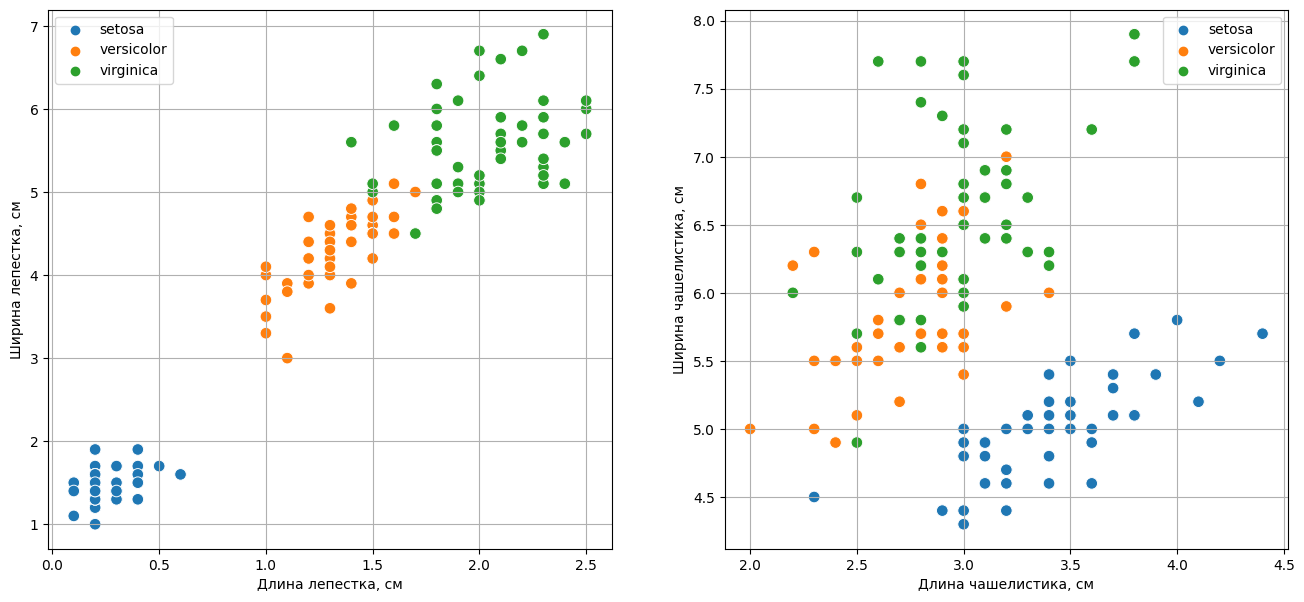

In [12]:
# Объявляем фигуру из двух графиков и её размер
plt.figure(figsize = (16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid()

# Правый график
plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width', y='sepal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid()

## 2.2.4. Пример
Из графиков видно, что в первом случае классы визуально хорошо
отделимы друг от друга, хотя два классе имеют небольшое пересечение.
Во втором случае разделить два класса между собой уже намного труднее.
Далее разделим датасет на обучающую и тестовую выборки в
соотношении 80:20. Обучающая выборка (training sample) — выборка, по
которой производится настройка (оптимизация параметров) модели
зависимости. Тестовая (или контрольная) выборка (test sample) —
выборка, по которой оценивается качество построенной модели.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
109,7.2,3.6,6.1,2.5
106,4.9,2.5,4.5,1.7
92,5.8,2.6,4.0,1.2
122,7.7,2.8,6.7,2.0


In [15]:
y_train.head()

60     versicolor
109     virginica
106     virginica
92     versicolor
122     virginica
Name: species, dtype: object

In [16]:
# Обучим метод трёх ближайших соседей
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

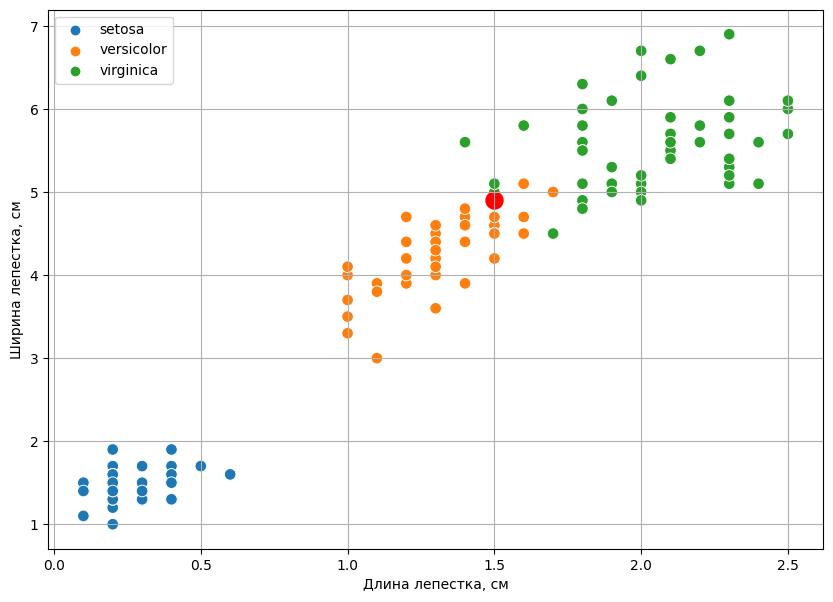

In [17]:
plt.figure(figsize = (10, 7))
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc = 2)
plt.grid()

for i in range(len(y_test)):
  if np.array(y_test)[i] != y_pred[i]:
    plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

In [18]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred): .3}')

accuracy:  0.967


## 2.3.1. Задание
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.


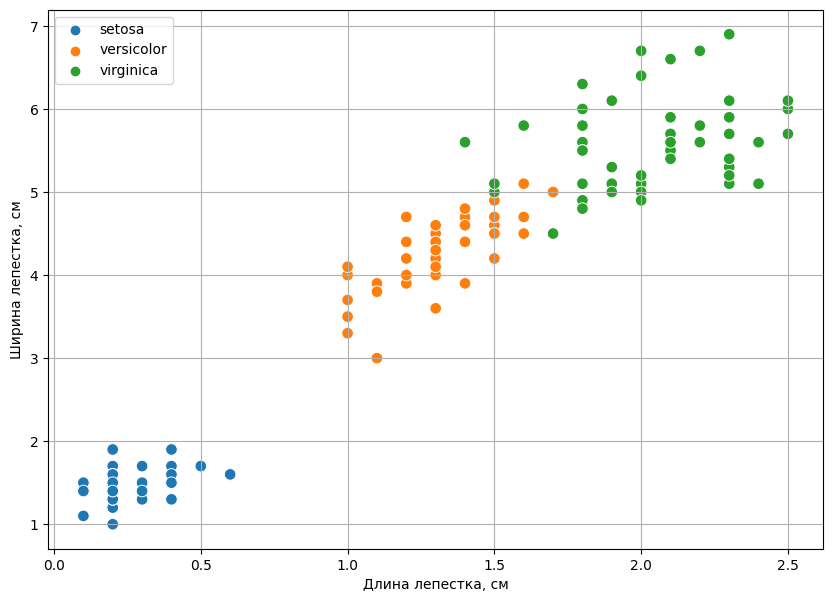

 accuracy: 1.0


In [19]:
iris = sns.load_dataset('iris')
iris

X_train, X_test, y_train, y_test = train_test_split(
iris.iloc[:, :-1],
iris.iloc[:, -1],
test_size = 0.15 # размер тестовой выборки
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
# метод ближайших соседей
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
# предикт
y_pred = model.predict(X_test)
y_pred
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()
# итерируясь через всех соседей
for i in range(len(y_test)):
    # если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
plt.show()

# качество модели (доля правильно классифицированных точек)
print(f' accuracy: {accuracy_score(y_test, y_pred) :.3}')


# 3.1. Работа с категориальными данными
## 3.2.1. Пример
Дан порядковый категориальный признак (например, высокий, средний,
низкий). Выполнить его кодировку.
Для решения задачи можно использовать метод replace фрейма данных
pandas для преобразования строковых меток в числовые эквиваленты.

In [20]:
dataframe = pd.DataFrame({'оценка': ['низкая', 'низкая', 'средняя', 'средняя', 'высокая']})
scale_mapper = {'низкая': 1, 'средняя': 2, 'высокая': 3}

dataframe['оценка'].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

## 3.2.2. Пример
Дан словарь, и требуется его конвертировать в матрицу признаков.
Для решения задачи можно задействовать класс-векторизатор словаря
Dictvectorizer.

In [21]:
data_dict = [
    {'красный': 2, 'синий': 4},
    {'красный': 4, 'синий': 3},
    {'красный': 1, 'желтый': 2},
    {'красный': 2, 'желтый': 2}
]

dictvectorizer = DictVectorizer(sparse = False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

## 3.3.2. Задание
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [22]:
data_dict = [{"карий": 2, "синий": 4},
{"карий": 4, "синий": 3},
{"карий": 1, "зеленый": 2},
{"карий": 2, "зеленый": 2}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
print(features)

[[0. 2. 4.]
 [0. 4. 3.]
 [2. 1. 0.]
 [2. 2. 0.]]
